In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

### Исследование параметра popsize

In [3]:
popsize_result = {}

In [4]:
for popsize in range(20):
    result = differential_evolution(ackley, bounds, seed=42, popsize = popsize)
    if dict(result)['success'] == True:
        popsize_result.update({popsize:dict(result)['fun']})

<AxesSubplot:xlabel='popsize', ylabel=' global minimum'>

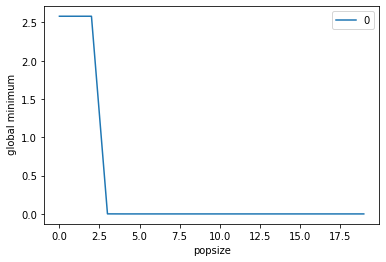

In [5]:
pd.DataFrame.from_dict(popsize_result, orient = 'index').plot(ylabel = ' global minimum', xlabel = 'popsize')

Оптимальный размер popsize = 3, дальнейшее увеличение параметра не приводит к уменьшение значения глобального минимума и, соответвенно, к более точному поиску.

### Исследование параметра tol

In [6]:
tol_result = {}
tol_range = np.linspace(-1,1, num = 5)

In [7]:
for tol in tol_range: 
    result = differential_evolution(ackley, bounds, seed=42, tol = tol)
    if dict(result)['success'] == True:
        tol_result.update({tol:dict(result)['fun']})

<AxesSubplot:xlabel='tol', ylabel=' global minimum'>

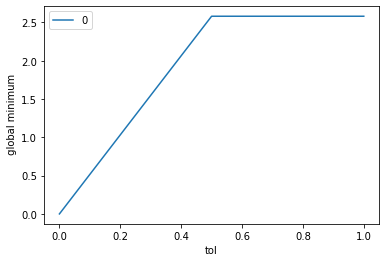

In [8]:
pd.DataFrame.from_dict(tol_result, orient = 'index').plot(ylabel = ' global minimum', xlabel = 'tol')

Исходя из полученных данных, можно сделать следующие выводы:
    параметр tol должен быть строго больше 0
    чем меньше параметр tol (стремится к нулю) тем точнее поиск глобального минимума

### Исследование параметра mutation:

In [9]:
mutation_result = {}
mutation_range = np.linspace(0,1.9, num = 10)

In [10]:
for mutation in mutation_range: 
    result = differential_evolution(ackley, bounds, seed=42, mutation = mutation)
    if dict(result)['success'] == True:
        mutation_result.update({mutation:dict(result)['fun']})

<AxesSubplot:xlabel='mutation', ylabel=' global minimum'>

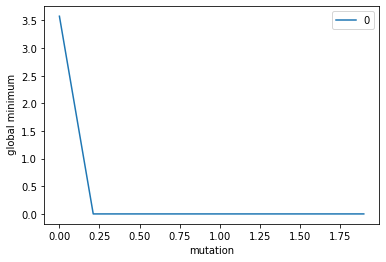

In [11]:
pd.DataFrame.from_dict(mutation_result, orient = 'index').plot(ylabel = ' global minimum', xlabel = 'mutation')

Наиболее точный поиск локального минимума функции достигается при значении mutation >0.2. При этом, по документакции данный параметр должен находится в пределах [0,2)

### Исследование параметра recombination

In [15]:
recombination_result = {}
recombination_range = np.linspace(0,0.9999, num = 10)

In [16]:
for recombination in recombination_range: 
    result = differential_evolution(ackley, bounds, seed=42, recombination = recombination)
    if dict(result)['success'] == True:
        recombination_result.update({recombination:dict(result)['fun']})

<AxesSubplot:xlabel='recombination', ylabel=' global minimum'>

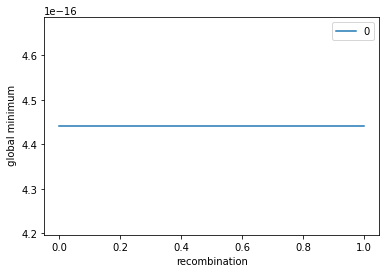

In [17]:
pd.DataFrame.from_dict(recombination_result, orient = 'index').plot(ylabel = ' global minimum', xlabel = 'recombination')

Параметр recombination не влияет на более точный поиск глобального минимума исследуемой функции. При этом, по документакции данный параметр должен находится в пределах [0,1)

### Исследование параметра updating

In [20]:
updating_result = {}
updating_value = ['immediate','deferred']

In [21]:
for updating in updating_value: 
    result = differential_evolution(ackley, bounds, seed=42, updating = updating)
    if dict(result)['success'] == True:
        updating_result.update({updating:dict(result)['fun']})

<AxesSubplot:xlabel='updating', ylabel=' global minimum'>

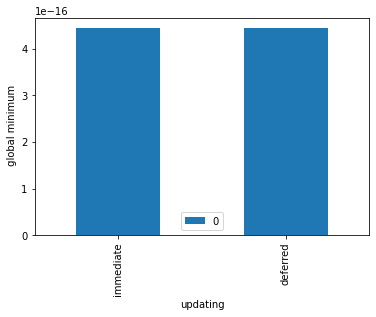

In [22]:
pd.DataFrame.from_dict(updating_result, orient = 'index').plot(kind = 'bar', ylabel = ' global minimum', xlabel = 'updating')

Использование параметра updating как immediate, так и deferred приводит к одному результату поиска глобального минимума функции и, таким образом, не влияет на значение глобального минимума исследуемой функции.

### Проверка всех стратегий для поиска глобального минимума функции

In [23]:
strategy_result = {}
strategy_result_fail = {}
strategy_value = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp',\
            'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [24]:
for strategy in strategy_value:
    result = differential_evolution(ackley, bounds, seed=42, strategy = strategy)
    if dict(result)['success'] == True:
        strategy_result.update({strategy:dict(result)['fun']})
    else:
        strategy_result_fail.update({strategy:dict(result)['fun']})

<AxesSubplot:xlabel='strategy', ylabel=' global minimum'>

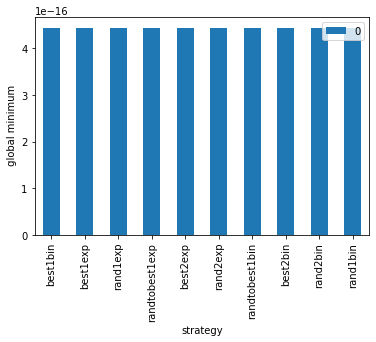

In [25]:
pd.DataFrame.from_dict(strategy_result, orient = 'index').plot(kind = 'bar', ylabel = ' global minimum', xlabel = 'strategy')

Значения глобального минимума функции одинаковые при использовании тех стратегий, которые привели к успешному поиску глобального минимума исследуемой функции, не отличаются. Таким образом, все вышеперечисленные стратегии можно использовать для поиска глобального минимума исследуемой функции.

In [26]:
strategy_result_fail.keys()

dict_keys(['currenttobest1exp', 'currenttobest1bin'])

Стратегии поиска глобального минимума такие как currenttobest1exp, currenttobest1bin оказались неудачными и неподходят для вычисления глобального минимума исследуемой функции

### Общий вывод

Таким образом, при исследовании параметров функции differential_evolution были найдены следуюие оптимальные параметры:
- popsize >= 3
- tol = 0.01 и менее
- mutation >0.2
- recombination не влияет на нахождение значения глобального минимума исследуемой функции
- updating ('immediate', 'deferred') не влияет на нахождение значения глобального минимума исследуемой функции
- стратегии ('best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'best2bin', 'rand2bin', 'rand1bin') приводили к успешному поиску минимума исследуемой функции
- стратегии ('currenttobest1exp', 'currenttobest1bin') не приводили к успешному поиску минимума исследуемой функции